# **Laboratorio 8: Ready, Set, Deploy! üë©‚ÄçüöÄüë®‚ÄçüöÄ**

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Pe√±a, Valentina Rojas
- Ayudantes: Nicol√°s Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Josefa Anselmo.
- Nombre de alumno 2: Tamara Carrasco.

### **Link de repositorio de GitHub:** [TamoJosha](https://github.com/Tamaracarrasco/TamoJosha-Lab-de-Prog-MDS-Prim2025)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerizaci√≥n del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia ser√° debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no est√©n en u-cursos no ser√°n revisados. Recuerden que el repositorio tambi√©n tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una soluci√≥n a un problema a partir de ML
- Desplegar su soluci√≥n usando MLFlow, FastAPI y Docker

El laboratorio deber√° ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al m√°ximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante m√°s eficientes que los iteradores nativos sobre DataFrames.

# **Introducci√≥n**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renac√≠n, Smapina ha deca√≠do en su desempe√±o, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria p√∫blica de la municipalidad de Maip√∫ se ha contactado con ustedes para que le entreguen una urgente soluci√≥n a este problema (a la vez que dejan a Smapina, al igual que Renac√≠n, sin trabajo üòî).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de m√∫ltiples sensores IOT colocados en diversas ca√±er√≠as, conductos y estanques. Estos sensores se√±alan nueve tipos de mediciones qu√≠micas y m√°s una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maip√∫ y su intoxicaci√≥n podr√≠a implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripci√≥n de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimizaci√≥n de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta secci√≥n es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimizaci√≥n de los hiperpar√°metros de sus modelos.

Como a√∫n no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¬°¬øQu√© !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de c√≥digo abierto que simplifica la gesti√≥n y seguimiento de proyectos de aprendizaje autom√°tico. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, adem√°s de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran n√∫mero de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la informaci√≥n guardada tras la ejecuci√≥n de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en s√≠ mismo. Dentro de cada `run` podremos acceder a informaci√≥n como los hiperpar√°metros utilizados, las m√©tricas obtenidas, las librer√≠as requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o m√°s `runs`. De esta manera, es posible tambi√©n registrar m√©tricas, par√°metros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¬øc√≥mo se usa en la pr√°ctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning gen√©rico, podemos registrar la informaci√≥n relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar autom√°ticamente informaci√≥n del entrenamiento
with mlflow.start_run(): #¬†delimita inicio y fin del run
    #¬†aqu√≠ comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aqu√≠ termina el run
```

Si ustedes ejecutan el c√≥digo anterior en sus m√°quinas locales (desde un jupyter notebook por ejemplo) se dar√°n cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el c√≥digo anterior, se crear√° otra carpeta y no tendr√°n acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos tambi√©n algunos comandos √∫tiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_m√©trica", m√©trica)`: Les permite registrar una m√©trica *custom* bajo el nombre de "nombre_m√©trica"


## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **m√°s sabor**. El objetivo de este apartado es simple: automatizar la optimizaci√≥n de los par√°metros de nuestros modelos usando `Optuna` y registrando de forma autom√°tica cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la funci√≥n `optimize_model`, la cual debe:
- **Optimizar los hiperpar√°metros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegur√°ndose de que la m√©trica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gr√°ficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la funci√≥n `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el c√≥digo en `optimize.py`**. La ejecuci√≥n de `python optimize.py` deber√≠a ejecutar la funci√≥n `optimize_model`.
- **Guardar las versiones de las librer√≠as utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gr√°fico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser √∫til revisar los par√°metros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [3]:
# Importaci√≥n de librer√≠as importantes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# carga de los datos
df = pd.read_csv("water_potability.csv", sep=",")

# EDA inicial
print("Dimensiones del dataset: ", df.shape)
print("Columnas del dataset: \n", df.columns.tolist())

# valores nulos

print("Valores nulos: \n", df.isna().sum())

# Valores duplicados

print("Valores duplicados: \n", df.duplicated().sum())

# columnas

df_num_cols = df.select_dtypes(include="number").columns.tolist()
df_cat_cols = df.select_dtypes(include=["object", "category", "string"]).columns.tolist()

print("Columnas num√©ricas: \n", df_num_cols)
print("Columnas categ√≥ricas: \n", df_cat_cols)


df.head(3)

Dimensiones del dataset:  (3276, 10)
Columnas del dataset: 
 ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
Valores nulos: 
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Valores duplicados: 
 0
Columnas num√©ricas: 
 ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
Columnas categ√≥ricas: 
 []


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0

**Comentario:** 
- Todas las columnas son num√©ricas.
- No hay valores duplicados.
- Hay valores faltantes en las columnas : ``ph``, ``Sulfate``, y ``Trihalomethanes``. Se realizan gr√°ficos para ver la distribuci√≥n de las variables y as√≠ determinar las imputaciones.


==================== Describe de la variable ph ====================
count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64


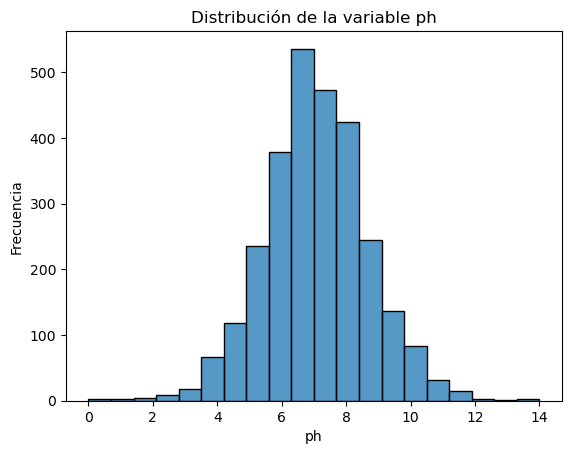

==================== Describe de la variable Hardness ====================
count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64


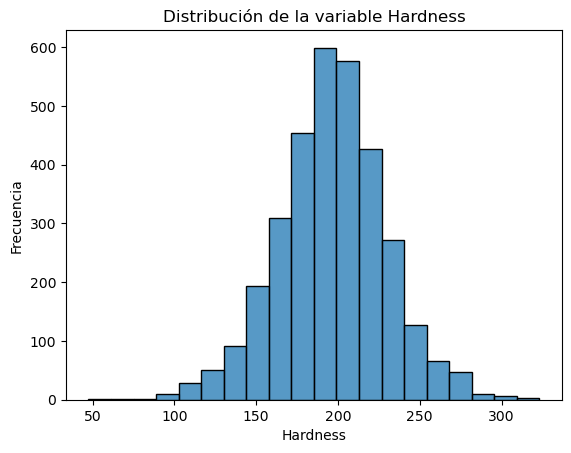

==================== Describe de la variable Solids ====================
count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64


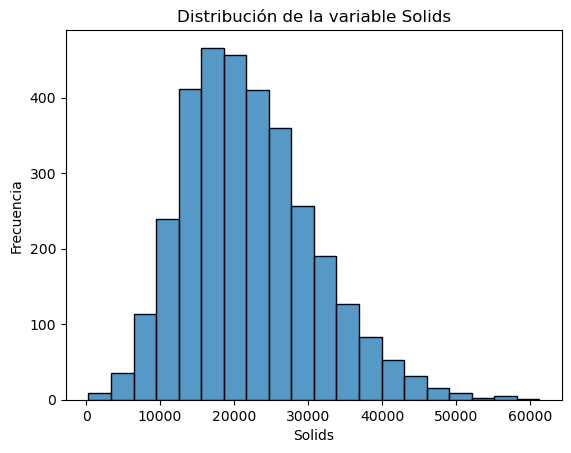

==================== Describe de la variable Chloramines ====================
count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64


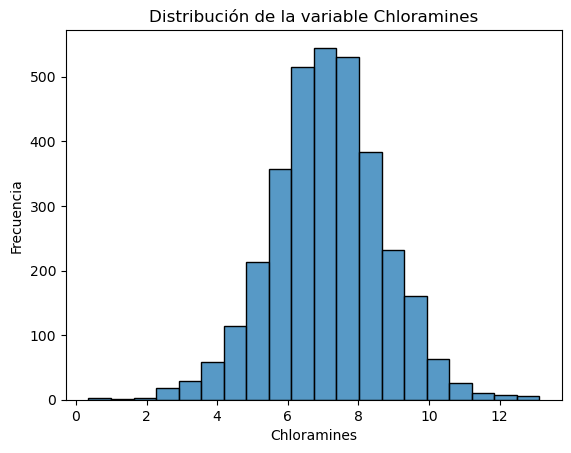

==================== Describe de la variable Sulfate ====================
count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64


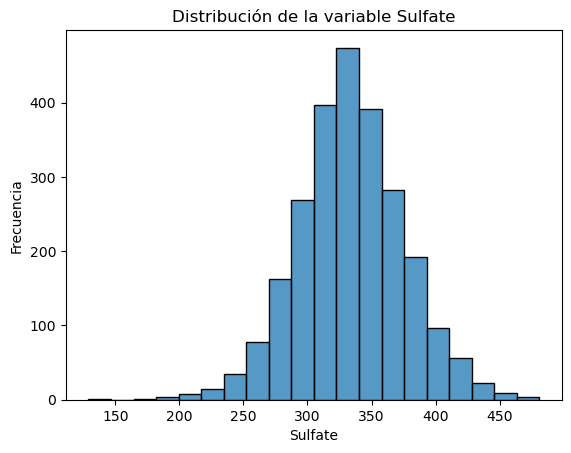

==================== Describe de la variable Conductivity ====================
count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64


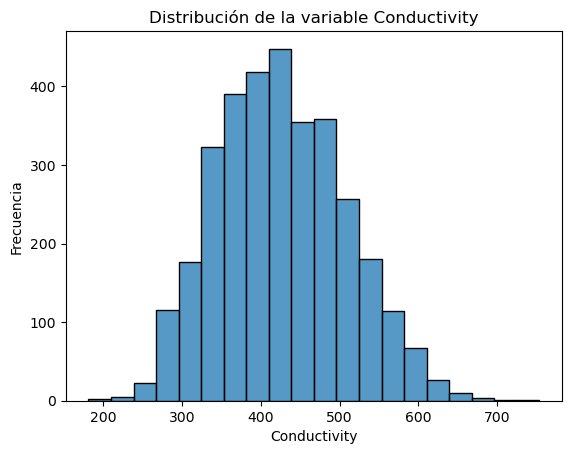

==================== Describe de la variable Organic_carbon ====================
count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64


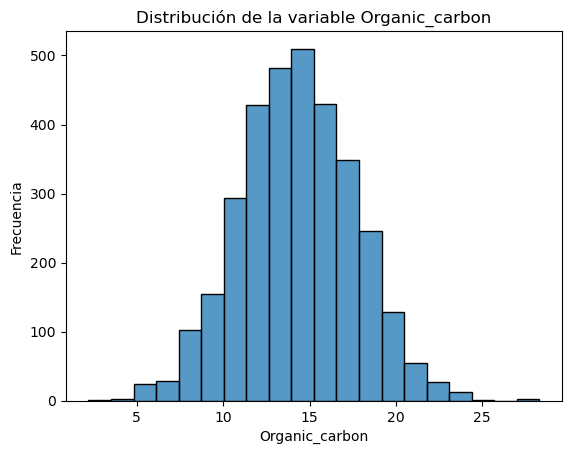

==================== Describe de la variable Trihalomethanes ====================
count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64


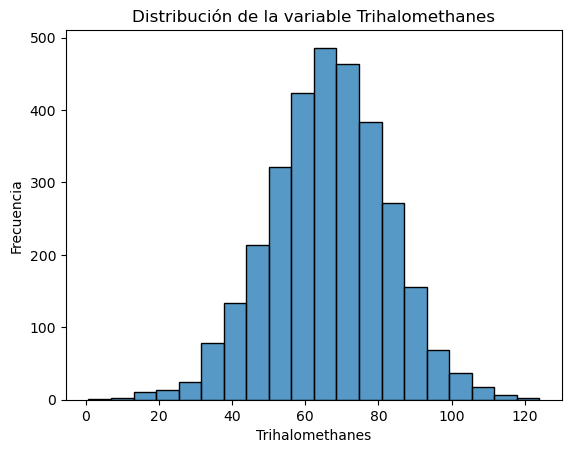

==================== Describe de la variable Turbidity ====================
count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64


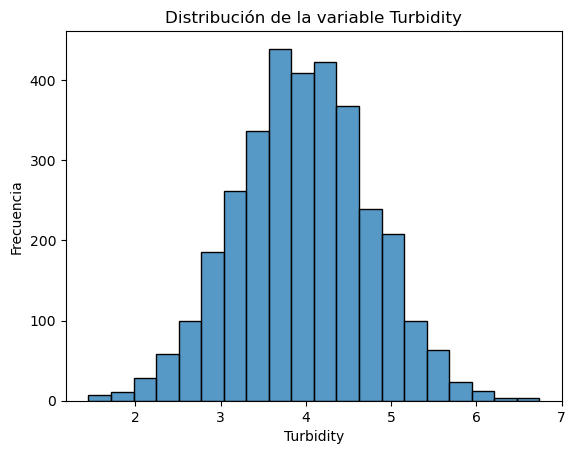

==================== Describe de la variable Potability ====================
count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64


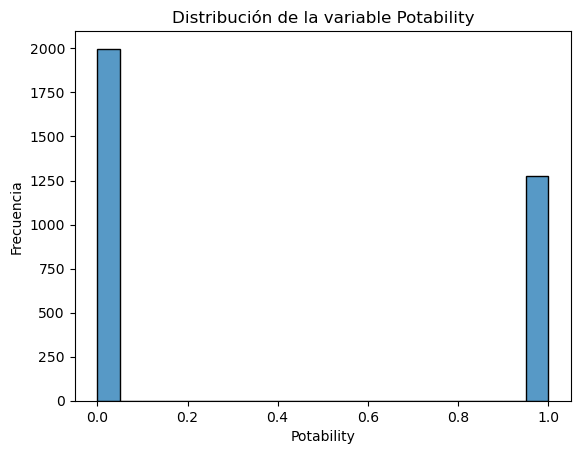

In [6]:
# Se procede a realizar gr√°ficos
# para ver la distribuci√≥n

for col in df_num_cols:
    print("="*20 + f" Describe de la variable {col} " + "="*20)
    print(df[col].describe())
    plt.figure()
    plt.clf()
    plt.title(f"Distribuci√≥n de la variable {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frecuencia")
    sns.histplot(data=df, x=col, bins=20)
    plt.show()
   


**Comentarios:**
- La variable target ``Potability`` presenta desbalance.
- Se implementar√° la imputaci√≥n de la mediana.
- La mayor√≠a de las variables predictoras siguen una distribuci√≥n normal y presentan distintas escalas, por lo que es v√°lido aplicar un standarscaler.
- Solo la variable ``Solids`` Presenta un sesgo a la derecha (valores extremos a la derecha).

In [7]:
## importaci√≥n de librer√≠as para pipeline

# imputacion
from sklearn.impute import SimpleImputer

# escalamiento
from sklearn.preprocessing import StandardScaler

# pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# separaci√≥n de conjuntos
from sklearn.model_selection import train_test_split

# modelo
from xgboost import XGBClassifier

# m√©tricas
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report


In [ ]:
def optimize_model():
  pass

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta secci√≥n es generar una API REST a la cual se le pueda hacer *requests* para as√≠ interactuar con su modelo. En particular, se le pide:

- Guardar el c√≥digo de esta secci√≥n en el archivo `main.py`. Note que ejecutar `python main.py` deber√≠a levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medici√≥n de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor deber√≠a retornar una respuesta HTML con c√≥digo 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar seg√∫n el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el √©xito de su aplicaci√≥n web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creaci√≥n de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el c√≥digo fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicaci√≥n. Para la dockerizaci√≥n, aseg√∫rese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir im√°genes en el notebook** que muestren la ejecuci√≥n del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en t√©rminos de recursos.

## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar m√°s en el tema y decide realizarle las siguientes consultas:

- ¬øC√≥mo se diferencia Docker de una m√°quina virtual (VM)?
- ¬øCu√°l es la diferencia entre usar Docker y ejecutar la aplicaci√≥n directamente en el sistema local?
- ¬øC√≥mo asegura Docker la consistencia entre diferentes entornos de desarrollo y producci√≥n?
- ¬øC√≥mo se gestionan los vol√∫menes en Docker para la persistencia de datos?
- ¬øQu√© son Dockerfile y docker-compose.yml, y cu√°l es su prop√≥sito?

# Conclusi√≥n

√âxito!
<div align="center">
  <img src="https://i.pinimg.com/originals/55/f5/fd/55f5fdc9455989f8caf7fca7f93bd96a.gif" width="500">
</div>